In [ ]:
# Standard libraries
import re
import csv
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import geopandas
# mport pycountry
import geopy

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Downloads
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


# Preprocessing
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  
from sklearn.feature_extraction.text import CountVectorizer  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
python -m spacy download en_core_web_sm

SyntaxError: ignored

In [ ]:
!pip install geopandas
!pip install geopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.0 MB/s 
     |████████████████████████████████| 7.8 MB 46.1 MB/s 
     |████████████████████████████████| 16.6 MB 55.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def update(df):
    
    """
    This function creates a copy of the original train data and 
    renames the classes, converting them from numbers to words
    
    Input: 
    df: original dataframe
        datatype: dataframe
    
    Output:
    df: modified dataframe
        datatype: dataframe 
        
    """

    # df = train.copy()
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return df

df = update(df)
df.head()

,sentiment,message,tweetid
0,Anti,@tiniebeany climate change is an interesting h...,792927353886371840
1,Pro,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Pro,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Pro,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/twitter_sentiment_data.csv")

In [ ]:
def hashtag_extract(tweet):
    
    """
    This function takes in a tweet and extracts the top 15 hashtag(s) using regular expressions
    These hashtags are stored in a seperate dataframe 
    along with a count of how frequenty they occur
    
    Input:
    tweet: original tweets
           datatype: 'str'
           
    Output:
    hashtag_df: dataframe containing the top hashtags in the tweets
              datatype: dataframe         
    """
    
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(df['message'][df['sentiment'] == 'Pro'])
anti = hashtag_extract(df['message'][df['sentiment'] == 'Anti'])
neutral = hashtag_extract(df['message'][df['sentiment'] == 'Neutral'])
news = hashtag_extract(df['message'][df['sentiment'] == 'News'])

pro.head()

,hashtag,count
2,climate,504
35,climatechange,272
0,BeforeTheFlood,233
70,ActOnClimate,143
20,ParisAgreement,105


In [ ]:
def TweetCleaner(tweet):
    
    """
    This function uses regular expressions to remove url's, mentions, hashtags, 
    punctuation, numbers and any extra white space from tweets after converting 
    everything to lowercase letters.

    Input:
    tweet: original tweet
           datatype: 'str'

    Output:
    tweet: modified tweet
           datatype: 'str'
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
df['message'] = df['message'].apply(TweetCleaner)
df['message'] = df['message'].apply(TweetCleaner)

df.head()

,sentiment,message,tweetid
0,Anti,climate change is an interesting hustle as it ...,792927353886371840
1,Pro,rt watch right here as travels the world to ta...,793124211518832641
2,Pro,fabulous leonardo s film on change is brillian...,793124402388832256
3,Pro,rt just watched this amazing documentary by le...,793124635873275904
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153


In [ ]:
df.to_csv("/content/drive/MyDrive/cleaned_twitter_sentiment_data.csv")

In [ ]:
def lemma(df):
    

    df['length'] = df['message'].str.len()
    df['tokenized'] = df['message'].apply(word_tokenize)
    df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    wnl = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

df = lemma(df)
df.head()

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Anti,climate change is an interesting hustle as it ...,792927353886371840,122,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,Pro,rt watch right here as travels the world to ta...,793124211518832641,76,"[rt, watch, right, here, as, travels, the, wor...","[(rt, n), (watch, n), (right, r), (here, r), (...",rt watch right here a travel the world to tack...
2,Pro,fabulous leonardo s film on change is brillian...,793124402388832256,61,"[fabulous, leonardo, s, film, on, change, is, ...","[(fabulous, a), (leonardo, n), (s, n), (film, ...",fabulous leonardo s film on change be brillian...
3,Pro,rt just watched this amazing documentary by le...,793124635873275904,104,"[rt, just, watched, this, amazing, documentary...","[(rt, n), (just, r), (watched, v), (this, n), ...",rt just watch this amazing documentary by leon...
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153,125,"[rt, pranita, biswasi, a, lutheran, from, odis...","[(rt, n), (pranita, n), (biswasi, v), (a, n), ...",rt pranita biswasi a lutheran from odisha give...


In [ ]:
def frequency(tweet):
    
    """
    This function determines the frequency of each word in a collection of tweets 
    and stores the 25 most frequent words in a dataframe, 
    sorted from most to least frequent
    
    Input: 
    tweet: original tweets
           datatype: 'str'
           
    Output: 
    frequency: dataframe containing the top 25 words 
               datatype: dataframe          
    """
    
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(tweet)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency

# Extract the top 25 words in each class
pro_frequency = frequency(df['lemmatized'][df['sentiment']=='Pro'])
anti_frequency = frequency(df['lemmatized'][df['sentiment']=='Anti'])
news_frequency = frequency(df['lemmatized'][df['sentiment']=='News'])
neutral_frequency = frequency(df['lemmatized'][df['sentiment']=='Neutral'])

In [ ]:
# Create wordcloud for the anti climate change class
anti_words = ' '.join([text for text in anti_frequency['word']])
pro_words = ' '.join([text for text in pro_frequency['word']])
news_words = ' '.join([text for text in news_frequency['word']])
neutral_words = ' '.join([text for text in neutral_frequency['word']])
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti_words)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(neutral_words)

pro_frequency.tail()

,word,freq
20,denier,831
21,need,829
22,like,801
23,president,778
24,die,752


In [ ]:
def entity_extractor(tweet):
    
    """
    This function extracts the top 10 people, organizations and geopolitical entities 
    in a collection of tweets. 
    The information is then saved in a new dataframe

    Input:
    tweet: lemmatized tweets
           datatype: 'str'

    Output:
    df: dataframe containing the top 10 people, organizations and gpe's in a collection of tweets
        datatype: dataframe ('str')
    """
    
    # def get_people(tweet):  
    #     words = nlp(tweet)
    #     people = [w.text for w in words.ents if w.label_== 'PERSON']
    #     return people
    
    # def get_org(tweet):
    #     words = nlp(tweet)
    #     org = [w.text for w in words.ents if w.label_== 'ORG']
    #     return org
    
    def get_gpe(tweet):
        words = nlp(tweet)
        gpe = [w.text for w in words.ents if w.label_== 'GPE']
        return gpe
    
    # Extract the top 10 people
    # people = tweet.apply(lambda x: get_people(x)) 
    # people = [x for sub in people for x in sub]
    # people_counter = Counter(people)
    # people_count = people_counter.most_common(10)
    # people, people_count = map(list, zip(*people_count))
    
    # # Extract the top 10 organizations
    # org = tweet.apply(lambda x: get_org(x)) 
    # org = [x for sub in org for x in sub]
    # org_counter = Counter(org)
    # org_count = org_counter.most_common(10)
    # org, org_count = map(list, zip(*org_count))
    
    # Extract the top 10 geopolitical entities
    gpe = tweet.apply(lambda x: get_gpe(x)) 
    gpe = [x for sub in gpe for x in sub]
    gpe_counter = Counter(gpe)
    gpe_count = gpe_counter.most_common(10)
    gpe, gpe_count = map(list, zip(*gpe_count))
    
    # Create a dataframe to store the information
    df = pd.DataFrame({'geopolitics' : []})
    df['geopolitics'] = gpe
    # df['organizations'] = org
    
    return df

# Extract top entities for each class
anti_info = entity_extractor(df['lemmatized'][df['sentiment']=='Anti'])
pro_info = entity_extractor(df['lemmatized'][df['sentiment']=='Pro'])
news_info = entity_extractor(df['lemmatized'][df['sentiment']=='News'])
neutral_info = entity_extractor(df['lemmatized'][df['sentiment']=='Neutral'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


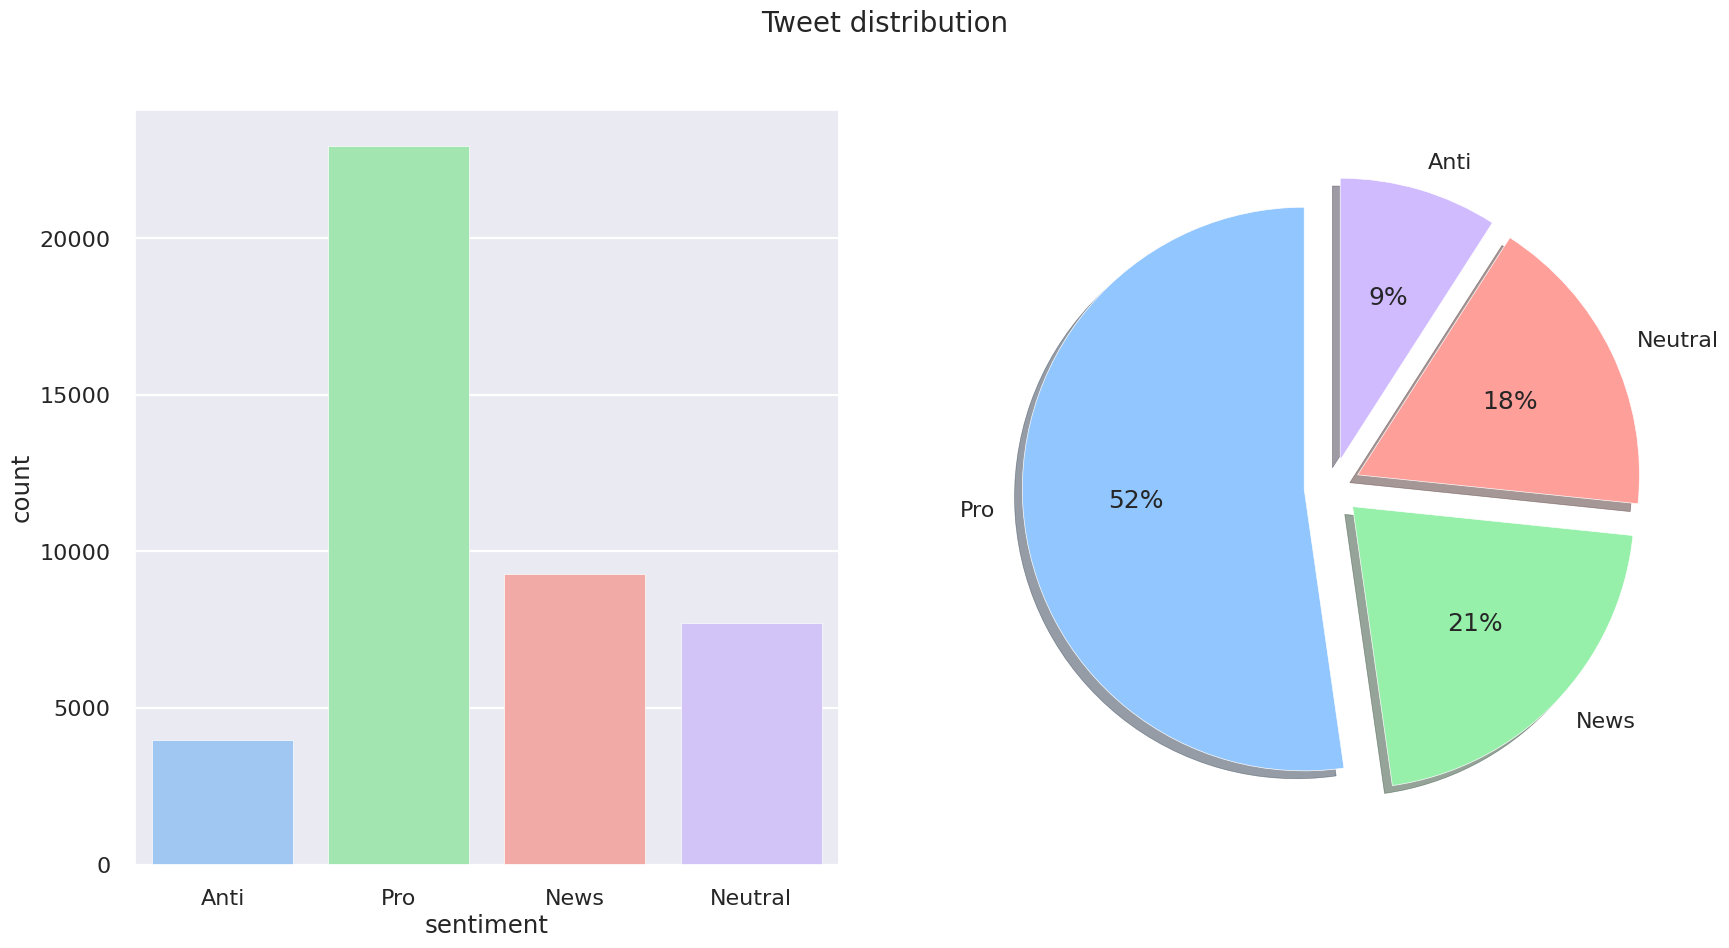

In [ ]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(df['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(df['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

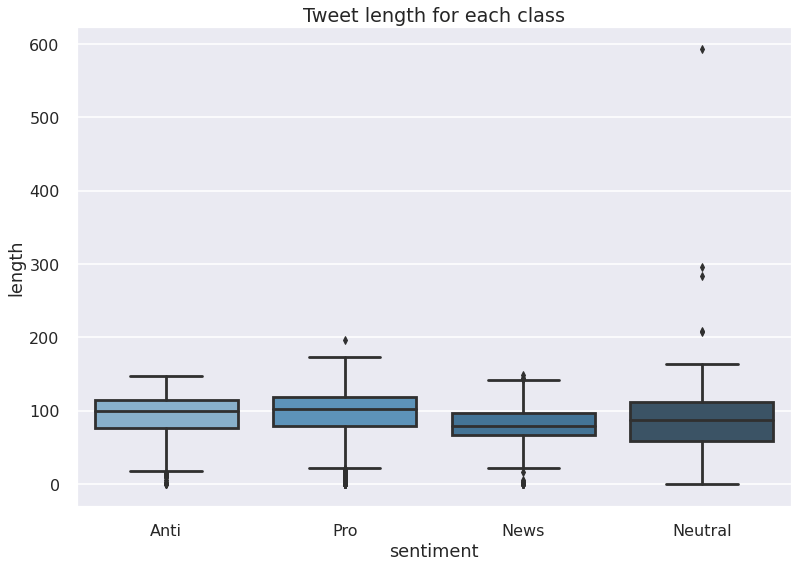

In [ ]:
# Plot the distribution of the length tweets for each class using a box plot
sns.boxplot(x=df['sentiment'], y=df['length'], data=df, palette=("Blues_d"))
plt.title('Tweet length for each class')
plt.show()

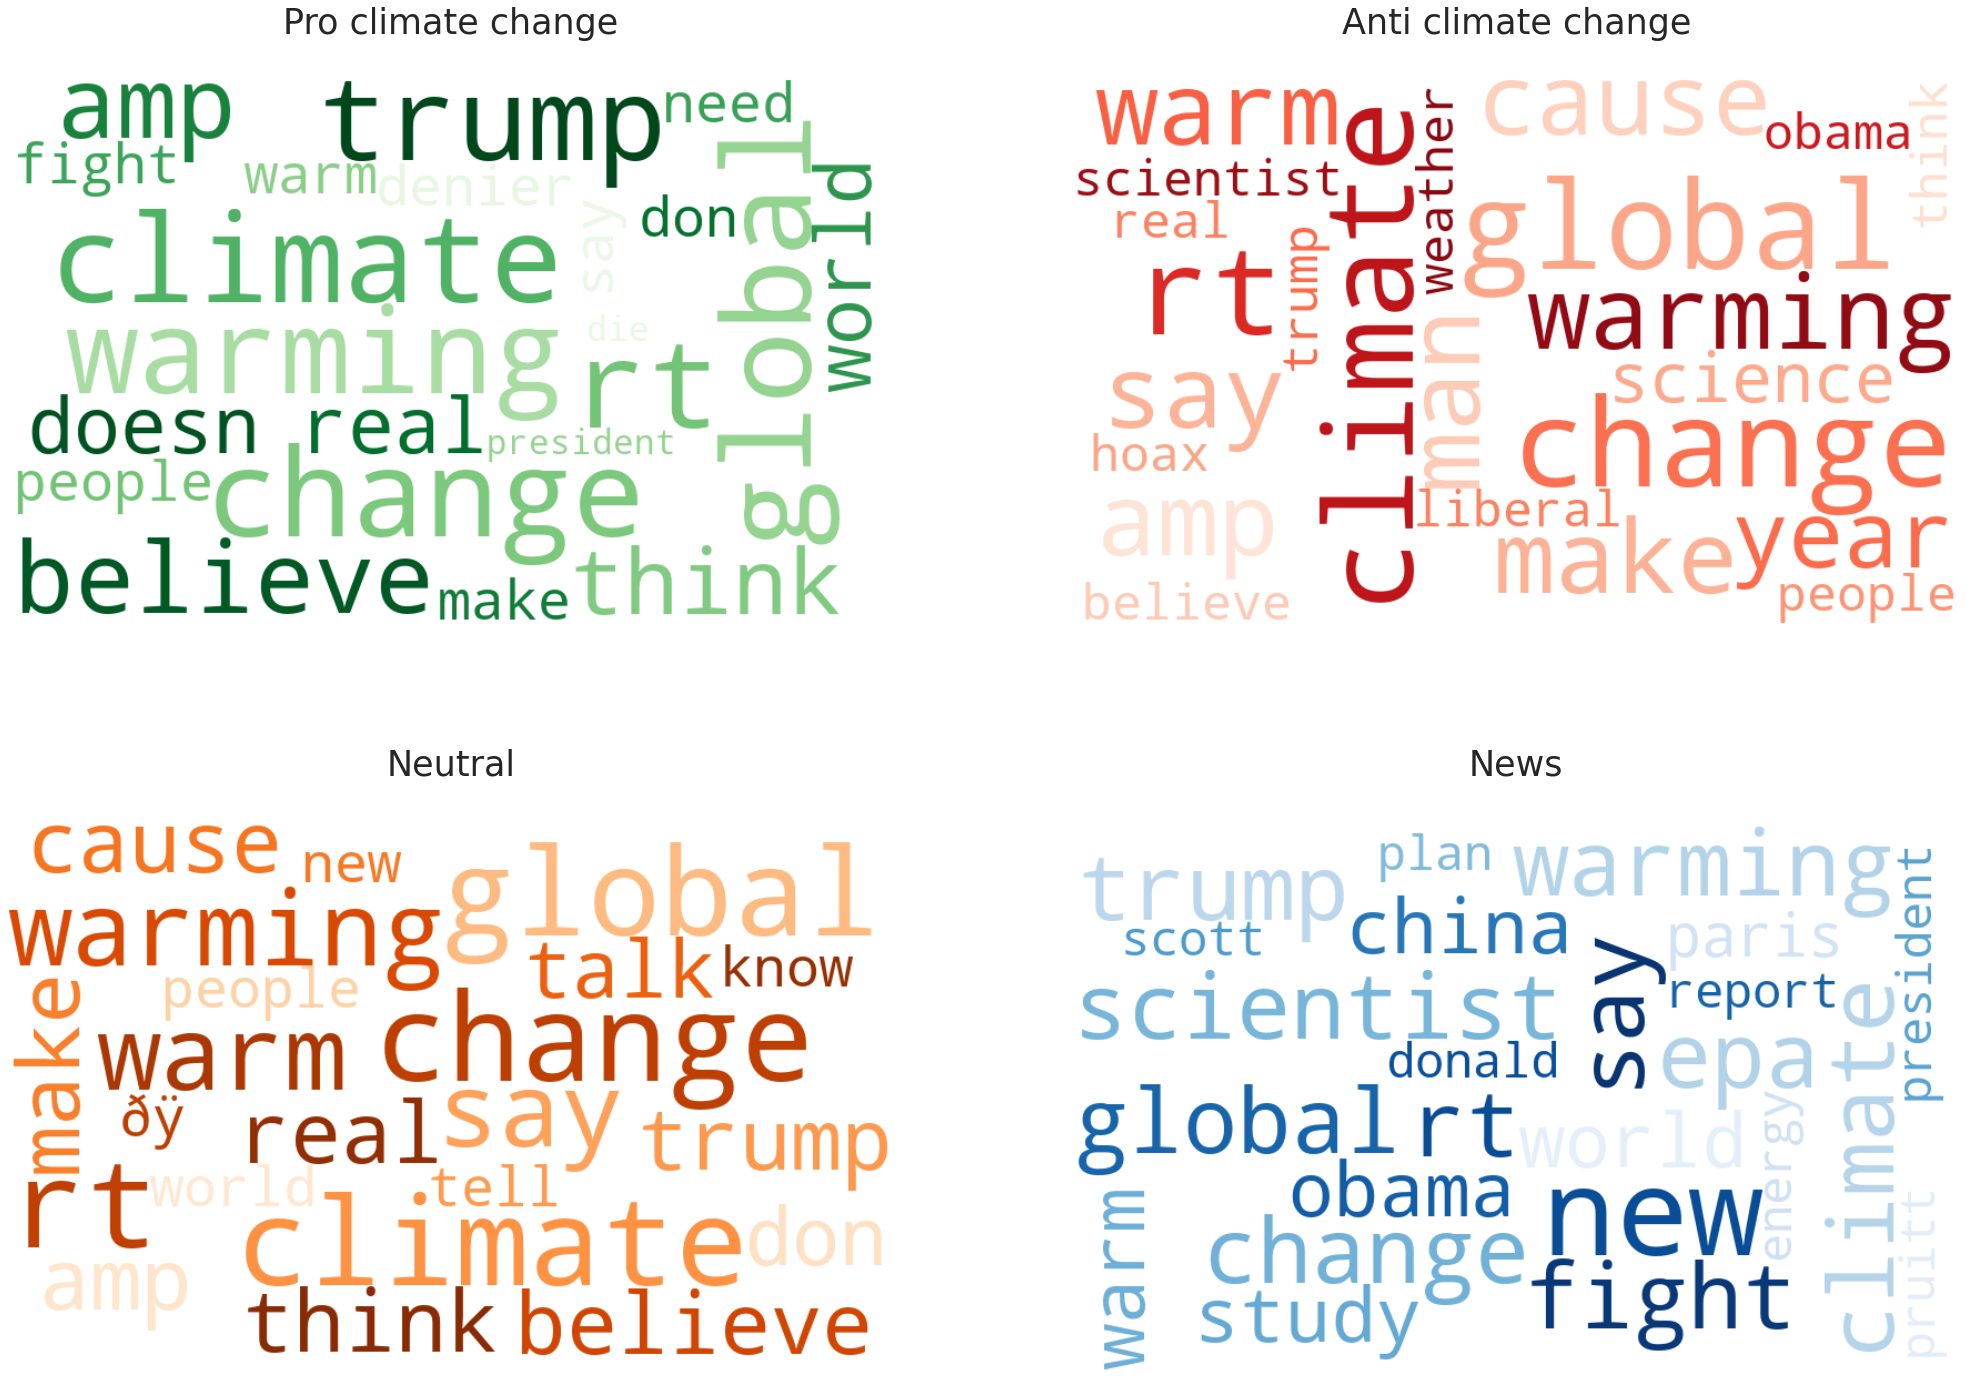

Pro climate change buzzwords 20-25 shown here for clarity 
- The wordcloud doesn't seem to pick up on 'http'


,word,freq
20,denier,831
21,need,829
22,like,801
23,president,778
24,die,752


In [ ]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()

print("Pro climate change buzzwords 20-25 shown here for clarity \n- The wordcloud doesn't seem to pick up on 'http'")
display(pro_frequency.tail())

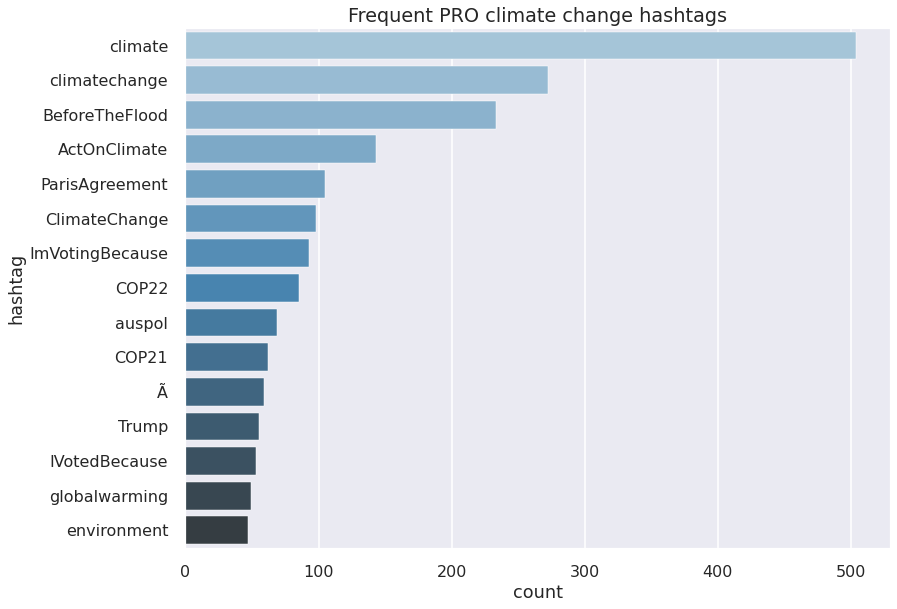

In [ ]:
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("Blues_d"))
plt.title('Frequent PRO climate change hashtags')
plt.tight_layout()

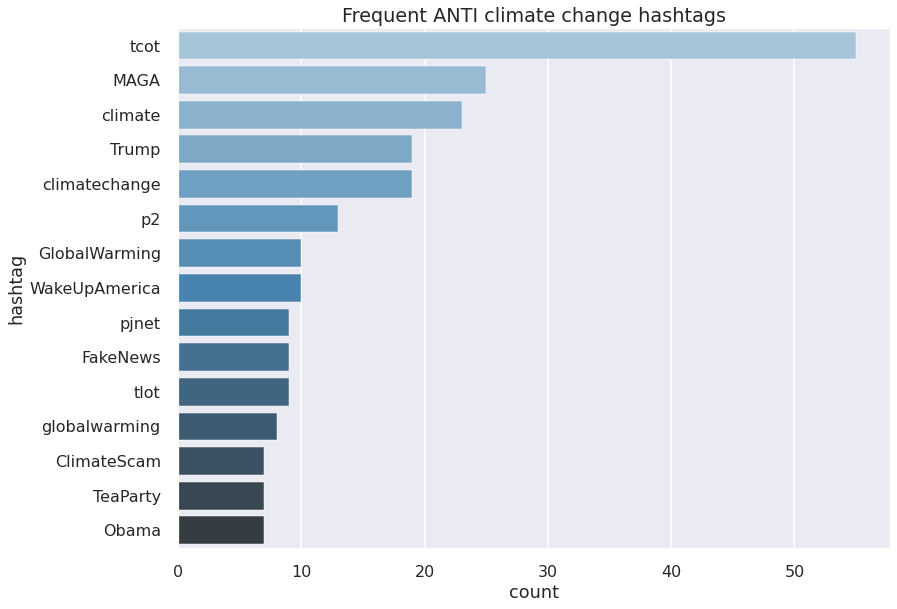

In [ ]:
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("Blues_d"))
plt.title('Frequent ANTI climate change hashtags')
plt.tight_layout()

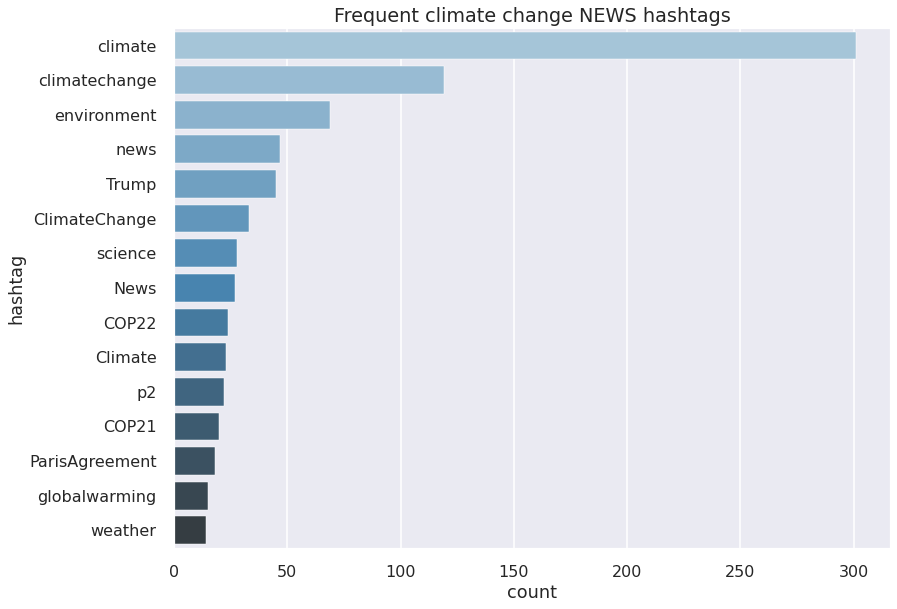

In [ ]:
# Plot the frequent hastags for the news and neutral classes
sns.barplot(y=news['hashtag'], x=news['count'], palette=("Blues_d"))
plt.title('Frequent climate change NEWS hashtags')
plt.tight_layout()

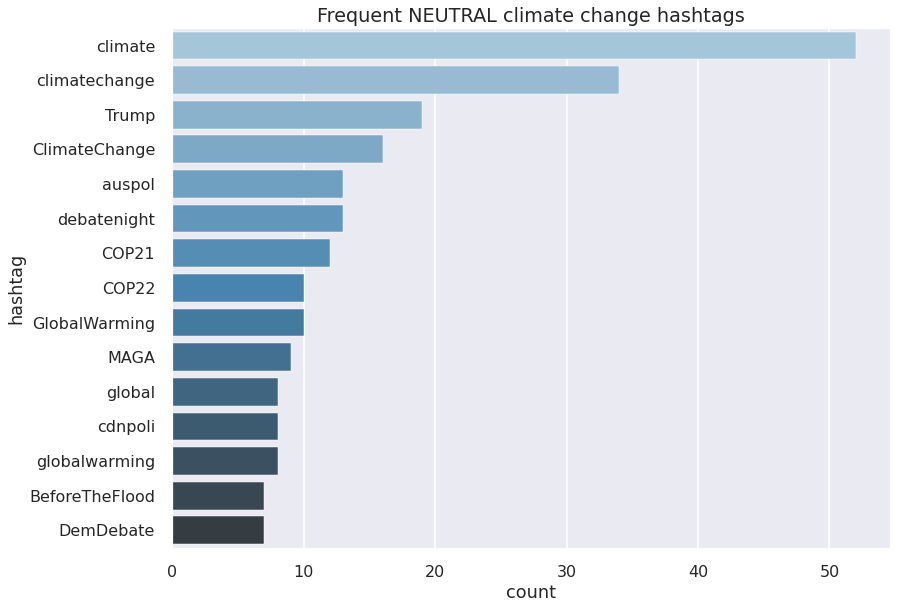

In [ ]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("Blues_d"))
plt.title('Frequent NEUTRAL climate change hashtags')
plt.tight_layout()

In [ ]:
display(pro_info.head(9))


,geopolitics
0,china
1,america
2,paris
3,florida
4,california
5,india
6,new york
7,australia
8,russia


In [ ]:
pro_info.to_csv("/content/drive/MyDrive/prgeo.csv")

In [ ]:
print('Anti climate change information')
display(anti_info)

Anti climate change information


,geopolitics
0,paris
1,america
2,russia
3,california
4,manhattan
5,china
6,florida
7,new york
8,chicago
9,texas


In [ ]:
anti_info.to_csv("/content/drive/MyDrive/antigeo.csv")

In [ ]:
anti_info.head()

,geopolitics
0,paris
1,america
2,russia
3,california
4,manhattan


In [ ]:
df.head()

,sentiment,message,tweetid,length,tokenized,pos_tags,lemmatized
0,Anti,climate change is an interesting hustle as it ...,792927353886371840,122,"[climate, change, is, an, interesting, hustle,...","[(climate, n), (change, n), (is, v), (an, n), ...",climate change be an interesting hustle a it b...
1,Pro,rt watch right here as travels the world to ta...,793124211518832641,76,"[rt, watch, right, here, as, travels, the, wor...","[(rt, n), (watch, n), (right, r), (here, r), (...",rt watch right here a travel the world to tack...
2,Pro,fabulous leonardo s film on change is brillian...,793124402388832256,61,"[fabulous, leonardo, s, film, on, change, is, ...","[(fabulous, a), (leonardo, n), (s, n), (film, ...",fabulous leonardo s film on change be brillian...
3,Pro,rt just watched this amazing documentary by le...,793124635873275904,104,"[rt, just, watched, this, amazing, documentary...","[(rt, n), (just, r), (watched, v), (this, n), ...",rt just watch this amazing documentary by leon...
4,News,rt pranita biswasi a lutheran from odisha give...,793125156185137153,125,"[rt, pranita, biswasi, a, lutheran, from, odis...","[(rt, n), (pranita, n), (biswasi, v), (a, n), ...",rt pranita biswasi a lutheran from odisha give...


In [ ]:
from geopy.geocoders import Nominatim
def gncode(gpe):
  lat=[]
  log=[]
  for v in gpe:
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    location = geolocator.geocode(v)
    lat.append(location.latitude)
    log.append(location.longitude)
  return lat,log
lat,log=gncode(pro_info['geopolitics'])
# lat1,log1=gncode(anti_info['geopolitics'])


In [ ]:
anti_info["lat"]=pd.Series(lat1)
anti_info["long"]=pd.Series(log1)

In [ ]:
pro_info["lat"]=pd.Series(lat)
pro_info["long"]=pd.Series(log)

In [ ]:
anti_info.head()

,geopolitics,lat,long
0,paris,48.858890,2.320041
1,america,39.783730,-100.445882
2,russia,64.686314,97.745306
3,california,36.701463,-118.755997
4,manhattan,40.789624,-73.959894


In [ ]:
pro_info.head()

,geopolitics,lat,long
0,china,35.000074,104.999927
1,america,39.783730,-100.445882
2,paris,48.858890,2.320041
3,florida,27.756767,-81.463983
4,california,36.701463,-118.755997


In [ ]:
gdf = geopandas.GeoDataFrame(
    anti_info, geometry=geopandas.points_from_xy(anti_info.long, anti_info.lat))

In [ ]:
gdf1 = geopandas.GeoDataFrame(
    pro_info, geometry=geopandas.points_from_xy(pro_info.long, pro_info.lat))

In [ ]:
gdf.head()

,geopolitics,lat,long,geometry
0,paris,48.858890,2.320041,POINT (2.32004 48.85889)
1,america,39.783730,-100.445882,POINT (-100.44588 39.78373)
2,russia,64.686314,97.745306,POINT (97.74531 64.68631)
3,california,36.701463,-118.755997,POINT (-118.75600 36.70146)
4,manhattan,40.789624,-73.959894,POINT (-73.95989 40.78962)


In [ ]:
gdf1.head()

,geopolitics,lat,long,geometry
0,china,35.000074,104.999927,POINT (104.99993 35.00007)
1,america,39.783730,-100.445882,POINT (-100.44588 39.78373)
2,paris,48.858890,2.320041,POINT (2.32004 48.85889)
3,florida,27.756767,-81.463983,POINT (-81.46398 27.75677)
4,california,36.701463,-118.755997,POINT (-118.75600 36.70146)


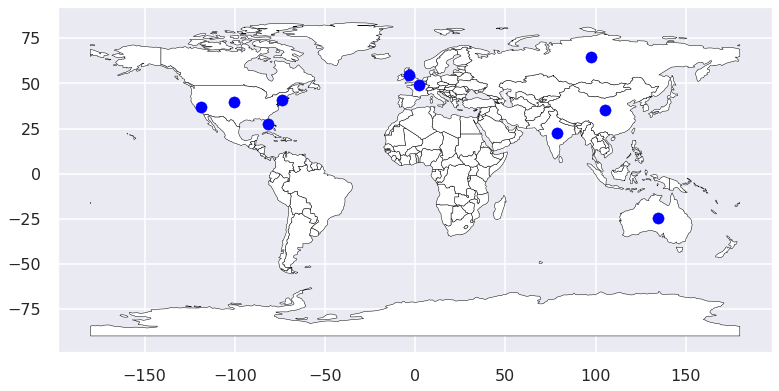

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf1.plot(ax=ax, color='blue')

plt.show()

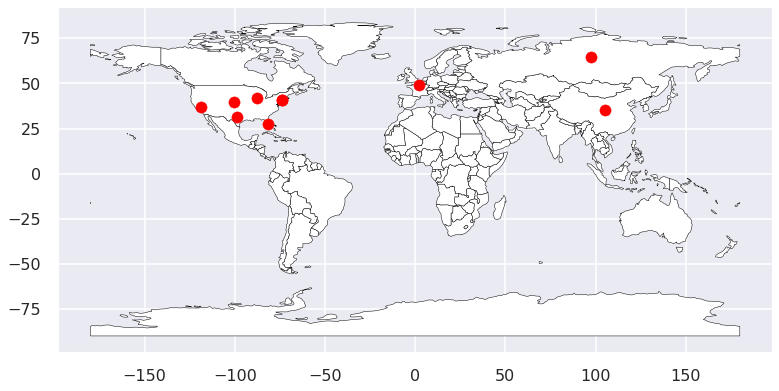

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')


gdf.plot(ax=ax, color='red')

plt.show()